In [1]:
import pandas as pd

In [2]:
Data = pd.read_csv('0617_8688.csv', encoding = 'utf-8', engine = 'python')
Data.head()

,내용
0,"이산가족, 친척, 애명은, 권씨, 권씨의아들, 사촌형, 권씨, 권씨, 오촌조카, 권..."
1,"강남, 안경원, 사장님, 안녕, 사업, 자미, 8월, 안경, 중공, 사람, 사진, ..."
2,"재삼, 말숨, 해결, 해주시면, 감사, 명년, 8월, 88올님픽, 갈려고, 고려, ..."
3,"번영창성, 고국, 련락, 서울, 아데아운동대회, 성황, 텔레비, 88년, 세계올림..."
4,"고마와, 괘력달력, 우편비가, 속심말, 량해, 편집아저씨, 중국, 흑룡강성, 할빈시..."


In [3]:
kor = Data['내용'].str.contains('조국|한국|대한민국|남한|북한|고향')
kor_pd = Data[kor]
kor_pd.head()

,내용
0,"이산가족, 친척, 애명은, 권씨, 권씨의아들, 사촌형, 권씨, 권씨, 오촌조카, 권..."
23,"안영, 무고, 보내주신, 오늘의한국, 밧고, 기버서, 올림픽, 식구, 조화햇슴니다,..."
24,"편지, 연락, 고향, 동포, 민족, 문화, 풍습, 학습, 재료, 부족, 곤난, 책,..."
25,"안녕, 여러분, 인사, 저, 86년도, 그립든, 고향, 88서울올림픽, 구경, 꼭,..."
28,"김포공항, 이별, 편지, 회답, 몸, 무고, 영읍, 손자녀, 별고, 알고십다, 막냉..."


In [4]:
from konlpy.tag import Okt
twitter = Okt()

In [5]:
test_kor = []
for line in kor_pd['내용']:
    test_kor.append(line)
test_kor[:2]

['이산가족, 친척, 애명은, 권씨, 권씨의아들, 사촌형, 권씨, 권씨, 오촌조카, 권씨, 고종사촌, 김씨, 살아있을것, 자손, 창원군, 대학, 광복시, 신의주, 고향창원군대산면가술리, 밀양오방동, 반가운소식',
 '안영, 무고, 보내주신, 오늘의한국, 밧고, 기버서, 올림픽, 식구, 조화햇슴니다, 고맙, 부탁, 부탁, 노력, 연로, 준비, 한중, 관계, 조화지니까, 소문, 모국, 친척, 신새, 문제, 알아보아서, 미안, 중화인민공화국, 하북성, 친황다오시, 해항구, 산동장소구']

In [6]:
sentences_tag_kor = []
for sentence in test_kor:
    morph = twitter.pos(sentence)
    sentences_tag_kor.append(morph)
sentences_tag_kor[:2]

[[('이산가족', 'Noun'),
  (',', 'Punctuation'),
  ('친척', 'Noun'),
  (',', 'Punctuation'),
  ('애', 'Noun'),
  ('명', 'Suffix'),
  ('은', 'Josa'),
  (',', 'Punctuation'),
  ('권씨', 'Noun'),
  (',', 'Punctuation'),
  ('권씨', 'Noun'),
  ('의', 'Josa'),
  ('아들', 'Noun'),
  (',', 'Punctuation'),
  ('사촌형', 'Noun'),
  (',', 'Punctuation'),
  ('권씨', 'Noun'),
  (',', 'Punctuation'),
  ('권씨', 'Noun'),
  (',', 'Punctuation'),
  ('오촌', 'Noun'),
  ('조카', 'Noun'),
  (',', 'Punctuation'),
  ('권씨', 'Noun'),
  (',', 'Punctuation'),
  ('고종사촌', 'Noun'),
  (',', 'Punctuation'),
  ('김씨', 'Noun'),
  (',', 'Punctuation'),
  ('살아있을것', 'Verb'),
  (',', 'Punctuation'),
  ('자손', 'Noun'),
  (',', 'Punctuation'),
  ('창원', 'Noun'),
  ('군', 'Suffix'),
  (',', 'Punctuation'),
  ('대학', 'Noun'),
  (',', 'Punctuation'),
  ('광복', 'Noun'),
  ('시', 'Noun'),
  (',', 'Punctuation'),
  ('신의주', 'Noun'),
  (',', 'Punctuation'),
  ('고향', 'Noun'),
  ('창원', 'Noun'),
  ('군', 'Suffix'),
  ('대산면', 'Noun'),
  ('가', 'Josa'),
  ('술리', 'Noun'),
  

In [7]:
adj_list_kor = []
for sentence1 in sentences_tag_kor:
    for word, tag in sentence1:
        if tag in ['Adjective']:
            adj_list_kor.append(word)
adj_list_kor[:5]

['반가운', '고맙', '반가운', '정확한', '작은의']

In [8]:
import json

In [9]:
def KnuSL(wordname):
    with open('SentiWord_info.json', encoding = 'utf-8-sig', mode = 'r') as f:
        data = json.load(f)
        
        result = ['None', 'None']
        for i in range(0, len(data)):
            if data[i]['word'] == wordname:
                result.pop()
                result.pop()
                result.append(data[i]['word_root'])
                result.append(data[i]['polarity'])
                
        r_word = result[0]
        s_word = result[1]
        
    return r_word, s_word

In [10]:
kor_r_words = []
kor_s_words = []
for k in range(0, len(adj_list_kor)):
    kor_r_words.append(KnuSL(adj_list_kor[k])[0])
    kor_s_words.append(KnuSL(adj_list_kor[k])[1])

In [11]:
kor_posneg_list = []
for k in range(0, len(adj_list_kor)):
    test = []
    test.append(kor_r_words[k])
    test.append(kor_s_words[k])
    kor_posneg_list.append(test)

In [12]:
kor_posneg_list[:15]

[['반갑', '2'],
 ['None', 'None'],
 ['반갑', '2'],
 ['정확', '1'],
 ['None', 'None'],
 ['그립', '1'],
 ['기쁘', '2'],
 ['기쁘', '2'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['더러운', '-2'],
 ['None', 'None'],
 ['None', 'None']]

In [13]:
kor_pos_list = []
kor_pos_score = []
kor_neg_list = []
kor_neg_score = []
for k in range(0, len(kor_posneg_list)):
    if kor_posneg_list[k][1] == '1':
        kor_pos_list.append(kor_posneg_list[k][0])
        kor_pos_score.append(kor_posneg_list[k][1])
    elif kor_posneg_list[k][1] == '2':
        kor_pos_list.append(kor_posneg_list[k][0])
        kor_pos_score.append(kor_posneg_list[k][1])
    elif kor_posneg_list[k][1] == '-1':
        kor_neg_list.append(kor_posneg_list[k][0])
        kor_neg_score.append(kor_posneg_list[k][1])
    elif kor_posneg_list[k][1] == '-2':
        kor_neg_list.append(kor_posneg_list[k][0])
        kor_neg_score.append(kor_posneg_list[k][1])

In [14]:
kor_neg_score[:3]

['-2', '-2', '-2']

In [15]:
print(len(kor_posneg_list))
print(len(kor_pos_list))
print(len(kor_neg_list))
print(len(kor_r_words))

12834
2442
498
12834


In [16]:
while 'None' in kor_s_words:
    kor_s_words.remove('None')
len(kor_s_words)

2944

In [17]:
pos_sum = 0
for k in range(0, len(kor_pos_score)):
    pos_sum += int(kor_pos_score[k])
pos_sum

3982

In [18]:
neg_sum = 0
for k in range(0, len(kor_neg_score)):
    neg_sum += int(kor_neg_score[k])
neg_sum

-800

In [19]:
from collections import Counter
count = Counter(kor_pos_list)
words = dict(count.most_common())
#words
for key, value in words.items():
    print(key, value)

그립 615
기쁘 427
좋 245
아름답 177
반갑 129
고맙 67
따뜻 65
새 61
높 47
무사히 37
즐겁 35
많 28
위대 28
젊 26
우수 25
훌륭 24
굳 23
재미있 21
귀중 20
좋아 19
행복 16
좋아하 14
친하 14
귀 11
부드럽 11
정확 9
새롭 9
똑똑 9
자세히 9
건강 9
흥겹 8
옳 7
중요 6
맑 6
부지런히 6
고상 6
참되 6
열렬히 5
너그럽 5
사랑 5
힘차 5
슬기 5
친절 5
유명 5
올바르 4
편히 3
대단 3
상당 3
튼튼히 3
유 3
소중히 3
드높 3
유쾌 3
유익 3
고귀 3
강하 3
평안히 3
즐거우 3
유리 2
친밀 2
만족 2
용감 2
부러워하 2
깨끗 2
화려 2
원만 2
달콤 2
편안히 2
편안 2
흐뭇 2
거룩 2
신성 2
화창 2
부럽 2
건전 2
곱 2
떳떳 2
중대 2
환 2
자유 2
간드러지 1
경건 1
꾸준히 1
이쁘 1
씩씩 1
곧 1
알맞 1
넉넉 1
우아 1
싹싹 1
산뜻 1
한결같 1
현명 1
익숙 1
뛰어나 1
착하 1
쾌활 1
다정 1
상냥 1
꾸준 1
너그러이 1
수월 1
솔직 1
소중 1
맛있 1
날씬 1
값지 1
귀하 1
자랑 1
설레이 1
진실 1
환하 1
적당 1
귀엽 1
정 1
활발 1
충분히 1
황홀 1
선량 1
영리 1
상쾌 1
시원 1
확실 1
괜찮 1
희 1


In [20]:
count = Counter(kor_neg_list)
words = dict(count.most_common())
#words
for key, value in words.items():
    print(key, value)

없 69
어렵 55
외롭 35
안타깝 32
슬프 25
아프 22
답답 14
쓰라리 12
미안 11
무정 10
부끄럽 10
쓸쓸 9
비참 9
두려워 9
괴롭 9
힘들 8
불행 8
애절 8
부족 8
서투르 7
조급 7
불쌍 6
서럽 6
무섭 6
서늘 5
낡 5
바쁘 4
쓰라림 4
싫 4
서운 4
섭섭 3
비싸 3
불쾌 3
불편 3
심하 3
약 3
더럽 3
더러운 2
가련 2
지루 2
불쌍히 2
딱하 2
고통 2
약하 2
하찮 2
아니 2
불안 2
초라 2
천한 2
허무 1
가소롭 1
애처롭 1
급하 1
쌀쌀 1
나쁘 1
두렵 1
죄송 1
불안정 1
쓸데없 1
이상 1
곤란 1
험하 1
상실 1
까다롭 1
가난 1
무례 1
괴상 1
참담 1
싫어하 1
반반 1
불결 1
분하 1
우울 1
허전 1
침침 1
어처구니없 1
비통 1
사납 1
괴 1
한심 1
번거롭 1


In [22]:
chn = Data['내용'].str.contains('중국|여기|한족|중화민국')
chn_pd = Data[chn]
chn_pd.head()

,내용
4,"고마와, 괘력달력, 우편비가, 속심말, 량해, 편집아저씨, 중국, 흑룡강성, 할빈시..."
6,"전씨, 금년, 65세, 이전, 43년전, 조선, 강원도, 통천군, 인남면, 장용포리..."
7,"귀체건강, 사업, 동포, 행복, 인도주의, 사업, 중국, 흑룡강성, 오상현, 진서촌"
15,"존경하는, 형님, 공작, 분망, 일어사전, 감사, 충심, 사진, 한씨, 누나, 사진..."
25,"안녕, 여러분, 인사, 저, 86년도, 그립든, 고향, 88서울올림픽, 구경, 꼭,..."


In [23]:
test_chn = []
for line in chn_pd['내용']:
    test_chn.append(line)

In [24]:
sentences_tag_chn = []
for sentence in test_chn:
    morph = twitter.pos(sentence)
    sentences_tag_chn.append(morph)
sentences_tag_chn[:2]

[[('고마', 'Noun'),
  ('와', 'Josa'),
  (',', 'Punctuation'),
  ('괘', 'Noun'),
  ('력', 'Suffix'),
  ('달력', 'Noun'),
  (',', 'Punctuation'),
  ('우편', 'Noun'),
  ('비', 'Noun'),
  ('가', 'Josa'),
  (',', 'Punctuation'),
  ('속', 'Modifier'),
  ('심말', 'Noun'),
  (',', 'Punctuation'),
  ('량해', 'Noun'),
  (',', 'Punctuation'),
  ('편집', 'Noun'),
  ('아저씨', 'Noun'),
  (',', 'Punctuation'),
  ('중국', 'Noun'),
  (',', 'Punctuation'),
  ('흑룡강성', 'Noun'),
  (',', 'Punctuation'),
  ('할', 'Verb'),
  ('빈시', 'Verb'),
  (',', 'Punctuation'),
  ('조선족', 'Noun'),
  ('제', 'Noun'),
  ('1', 'Number'),
  ('중학교', 'Noun'),
  (',', 'Punctuation'),
  ('고', 'Modifier'),
  ('중', 'Noun'),
  (',', 'Punctuation'),
  ('2', 'Number'),
  ('학년', 'Noun'),
  (',', 'Punctuation'),
  ('1', 'Number'),
  ('반', 'Noun')],
 [('전씨', 'Noun'),
  (',', 'Punctuation'),
  ('금년', 'Noun'),
  (',', 'Punctuation'),
  ('65', 'Number'),
  ('세', 'Noun'),
  (',', 'Punctuation'),
  ('이전', 'Noun'),
  (',', 'Punctuation'),
  ('43년', 'Number'),
  ('전', 'F

In [25]:
adj_list_chn = []
for sentence1 in sentences_tag_chn:
    for word, tag in sentence1:
        if tag in ['Adjective']:
            adj_list_chn.append(word)
adj_list_chn[:5]

['반가운', '정확한', '외롭기', '없', '남부럽지']

In [ ]:
chn_posneg_list = []
for k in range(0, len(adj_list_chn)):
    test = []
    test.append(chn_r_words[k])
    test.append(chn_s_words[k])
    chn_posneg_list.append(test)

In [16]:
chn_posneg_list[:30]

[['반갑', '2'],
 ['정확', '1'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['그립', '1'],
 ['기쁘', '2'],
 ['None', 'None'],
 ['기쁘', '2'],
 ['None', 'None'],
 ['행복', '2'],
 ['귀중', '2'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['없', '-1'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None']]

In [17]:
chn_pos_list = []
chn_pos_score = []
chn_neg_list = []
chn_neg_score = []
for k in range(0, len(chn_posneg_list)):
    if chn_posneg_list[k][1] == '1':
        chn_pos_list.append(chn_posneg_list[k][0])
        chn_pos_score.append(chn_posneg_list[k][1])
    elif chn_posneg_list[k][1] == '2':
        chn_pos_list.append(chn_posneg_list[k][0])
        chn_pos_score.append(chn_posneg_list[k][1])
    elif chn_posneg_list[k][1] == '-1':
        chn_neg_list.append(chn_posneg_list[k][0])
        chn_neg_score.append(chn_posneg_list[k][1])
    elif chn_posneg_list[k][1] == '-2':
        chn_neg_list.append(chn_posneg_list[k][0])
        chn_neg_score.append(chn_posneg_list[k][1])

In [18]:
chn_neg_score[:3]

['-1', '-2', '-1']

In [19]:
print(len(chn_posneg_list))
print(len(chn_pos_list))
print(len(chn_neg_list))
print(len(chn_r_words))
print(len(chn_s_words))

11789
1989
392
11789
11789


In [20]:
while 'None' in chn_s_words:
    chn_s_words.remove('None')
len(chn_s_words)

2384

In [21]:
pos_sum = 0
for k in range(0, len(chn_pos_score)):
    pos_sum += int(chn_pos_score[k])
pos_sum

3269

In [22]:
neg_sum = 0
for k in range(0, len(chn_neg_score)):
    neg_sum += int(chn_neg_score[k])
neg_sum

-610

In [23]:
count = Counter(chn_pos_list)
words = dict(count.most_common())
#words
for key, value in words.items():
    print(key, value)

그립 440
기쁘 429
좋 244
반갑 112
아름답 101
새 64
고맙 48
무사히 45
따뜻 40
높 35
즐겁 23
좋아 19
많 17
훌륭 16
우수 16
행복 15
위대 15
재미있 14
젊 14
정확 13
귀중 12
똑똑 11
부드럽 10
건강 9
친절 9
너그럽 8
자세히 8
귀 8
굳 8
흥겹 7
친하 7
새롭 7
소중히 6
좋아하 6
편안히 5
중요 5
유명 4
대단 4
부지런히 4
상당 4
자유 4
힘차 4
옳 4
꾸준 3
유 3
원만 3
넉넉 3
적당 3
유쾌 3
귀하 3
신성 3
정중히 3
편히 3
귀엽 3
설레 2
꾸준히 2
열렬히 2
유리 2
드높 2
친밀 2
고상 2
곱 2
슬기 2
깨끗 2
고귀 2
알맞 2
튼튼히 2
예쁘 2
선량 2
부럽 2
강하 2
자랑 2
평화 2
시원 2
즐거우 2
복 2
특별 1
용감히 1
사랑 1
맛있 1
부러워하 1
경건 1
싹싹 1
유용 1
한결같 1
현명 1
용감 1
유익 1
쾌활 1
다정 1
이쁘 1
솔직 1
평안히 1
건전 1
맑 1
오붓 1
산뜻 1
날씬 1
생생 1
설레이 1
달콤 1
착하 1
정 1
떳떳 1
의젓 1
공손히 1
화창 1
충분히 1
중대 1
황홀 1
영리 1
기뻐하 1
확실 1
괜찮 1


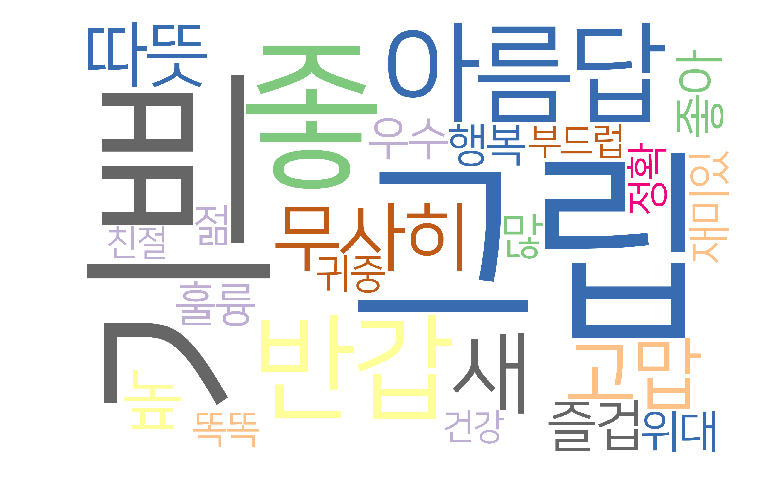

In [28]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/NanumSquare_acR.ttf', background_color = 'white', colormap = 'Accent_r',
                     max_words = 25, width = 3000, height = 2000).generate_from_frequencies(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [29]:
wordcloud.to_file('png/0617_8688중국긍정_25.png')

In [450]:
count = Counter(chn_neg_list)
words = dict(count.most_common())
#words
for key, value in words.items():
    print(key, value)

없 141
어렵 99
외롭 41
안타깝 37
아프 33
슬프 28
무정 19
부끄럽 18
미안 14
힘들 13
불쌍 13
섭섭 12
괴롭 11
약 11
답답 11
쓸쓸 9
무섭 9
부족 8
서럽 8
서투르 8
서운 8
심하 7
어리석 7
나쁘 6
조급 6
쓰라리 5
낡 5
어지럽 5
애절 4
서늘 4
무례 4
허전 4
한심 4
딱하 4
두려워 3
가난 3
하찮 3
죄송 3
쓰라림 3
급하 3
불편 3
우울 2
바쁘 2
처 2
애처롭 2
곤란 2
더럽 2
가볍 2
시끄럽 2
쓸쓸히 2
싫 2
심각 2
더러운 2
불쌍히 2
무능 2
불쾌 2
아니 2
미치 2
아쉽 2
불안 1
어둡 1
서먹서먹 1
서글프 1
위급 1
못마땅 1
지루 1
쌀쌀 1
거북 1
괴 1
가엾 1
가련 1
향기 1
부질없이 1
천하 1
쓸데없 1
속절없 1
간지럽 1
엉뚱 1
주제넘 1
괴상 1
황 1
비참 1
춥 1
싸늘 1
험하 1
불리 1
조마조마하 1
우습 1
억울 1
힘들이 1
비통 1
불행 1
사납 1
분하 1
딱 1
그릇 1
애달프 1
어처구니없 1
망하 1
독 1
천박 1
무리 1
비싸 1
캄캄하 1
번거롭 1


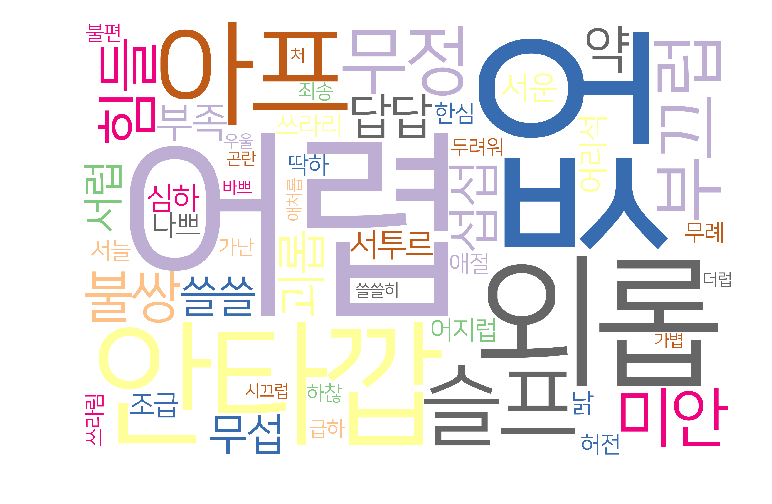

In [453]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/NanumSquare_acR.ttf', background_color = 'white', colormap = 'Accent_r',
                     max_words = 50, width = 3000, height = 2000).generate_from_frequencies(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [504]:
jpn = Data['내용'].str.contains('일본|왜국')
jpn_pd = Data[jpn]
jpn_pd.head()

,내용
1,"친인, 방송, 반가이, 조선민족, 위하여, 심혈, 선생님, 충심, 감사, 고중, 필..."
3,"사회교육방송국, 그리운, 희망막, 담당자, 심양시, 조선족, 중점학교, 공부, 고중..."
11,"이전, 형부, 형, 중국, 길림성, 반석현, 명성진, 고장, 살고, 일본놈, 망하든..."
16,"중화인민공화국, 조선족, 중학생, 조선동포, 그리는, 마음, 예로부터, 문명한, 언..."
17,"학습, 곤난, 상세, 한국방문, 동무, 부친, 조선족학생, 일본어학습, 부모님, 애..."


In [505]:
test_jpn = []
for line in jpn_pd['내용']:
    test_jpn.append(line)

In [506]:
sentences_tag_jpn = []
for sentence in test_jpn:
    morph = twitter.pos(sentence)
    sentences_tag_jpn.append(morph)
sentences_tag_jpn[:2]

[[('친', 'Noun'),
  ('인', 'Josa'),
  (',', 'Punctuation'),
  ('방송', 'Noun'),
  (',', 'Punctuation'),
  ('반가이', 'Adverb'),
  (',', 'Punctuation'),
  ('조선민족', 'Noun'),
  (',', 'Punctuation'),
  ('위', 'Noun'),
  ('하여', 'Verb'),
  (',', 'Punctuation'),
  ('심혈', 'Noun'),
  (',', 'Punctuation'),
  ('선생님', 'Noun'),
  (',', 'Punctuation'),
  ('충심', 'Noun'),
  (',', 'Punctuation'),
  ('감사', 'Noun'),
  (',', 'Punctuation'),
  ('고', 'Modifier'),
  ('중', 'Noun'),
  (',', 'Punctuation'),
  ('필업', 'Noun'),
  (',', 'Punctuation'),
  ('중등', 'Noun'),
  (',', 'Punctuation'),
  ('전업', 'Noun'),
  (',', 'Punctuation'),
  ('학교', 'Noun'),
  (',', 'Punctuation'),
  ('공부', 'Noun'),
  (',', 'Punctuation'),
  ('학생', 'Noun'),
  (',', 'Punctuation'),
  ('지금', 'Noun'),
  (',', 'Punctuation'),
  ('일본어', 'Noun'),
  (',', 'Punctuation'),
  ('공부', 'Noun'),
  (',', 'Punctuation'),
  ('본', 'Modifier'),
  ('민족', 'Noun'),
  (',', 'Punctuation'),
  ('언어', 'Noun'),
  (',', 'Punctuation'),
  ('사전', 'Noun'),
  (',', 'Punctuatio

In [507]:
adj_list_jpn = []
for sentence1 in sentences_tag_jpn:
    for word, tag in sentence1:
        if tag in ['Adjective']:
            adj_list_jpn.append(word)
adj_list_jpn[:5]

['그리운', '망하든해', '없으며', '작은', '없고']

In [508]:
jpn_r_words = []
jpn_s_words = []
for k in range(0, len(adj_list_jpn)):
    jpn_r_words.append(KnuSL(adj_list_jpn[k])[0])
    jpn_s_words.append(KnuSL(adj_list_jpn[k])[1])

In [509]:
jpn_posneg_list = []
for k in range(0, len(adj_list_jpn)):
    test = []
    test.append(jpn_r_words[k])
    test.append(jpn_s_words[k])
    jpn_posneg_list.append(test)

In [510]:
jpn_posneg_list[:15]

[['그립', '1'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['깨끗', '2'],
 ['None', 'None'],
 ['None', 'None'],
 ['좋', '2'],
 ['None', 'None'],
 ['None', 'None'],
 ['None', 'None'],
 ['기쁘', '2'],
 ['None', 'None'],
 ['None', 'None']]

In [511]:
jpn_pos_list = []
jpn_pos_score = []
jpn_neg_list = []
jpn_neg_score = []
for k in range(0, len(jpn_posneg_list)):
    if jpn_posneg_list[k][1] == '1':
        jpn_pos_list.append(jpn_posneg_list[k][0])
        jpn_pos_score.append(jpn_posneg_list[k][1])
    elif jpn_posneg_list[k][1] == '2':
        jpn_pos_list.append(jpn_posneg_list[k][0])
        jpn_pos_score.append(jpn_posneg_list[k][1])
    elif jpn_posneg_list[k][1] == '-1':
        jpn_neg_list.append(jpn_posneg_list[k][0])
        jpn_neg_score.append(jpn_posneg_list[k][1])
    elif jpn_posneg_list[k][1] == '-2':
        jpn_neg_list.append(jpn_posneg_list[k][0])
        jpn_neg_score.append(jpn_posneg_list[k][1])

In [512]:
print(len(jpn_posneg_list))
print(len(jpn_pos_list))
print(len(jpn_neg_list))
print(len(jpn_r_words))
print(len(jpn_s_words))

2625
318
96
2625
2625


In [513]:
while 'None' in jpn_s_words:
    jpn_s_words.remove('None')
len(jpn_s_words)

414

In [514]:
pos_sum = 0
for k in range(0, len(jpn_pos_score)):
    pos_sum += int(jpn_pos_score[k])
pos_sum

530

In [515]:
neg_sum = 0
for k in range(0, len(jpn_neg_score)):
    neg_sum += int(jpn_neg_score[k])
neg_sum

-158

In [467]:
count = Counter(jpn_pos_list)
words = dict(count.most_common())
#words
for key, value in words.items():
    print(key, value)

기쁘 158
그립 125
좋 84
반갑 42
아름답 33
새 26
무사히 20
따뜻 18
고맙 17
높 14
우수 12
젊 11
귀중 8
좋아 8
많 7
훌륭 4
부드럽 4
즐겁 4
위대 4
굳 4
귀 3
부지런히 3
친하 3
행복 3
중요 3
똑똑 3
좋아하 3
유용 2
적절 2
흥겹 2
맑 2
괜찮 2
순수 2
유명 2
정확 2
건강 2
착하 2
고상 2
너그럽 2
재미있 2
유리 2
옳 2
간드러지 1
분명 1
자유 1
원만 1
고귀 1
상당 1
특별 1
사랑 1
자랑 1
친밀 1
씩씩 1
힘차 1
꾸준 1
귀중히 1
들뜨 1
화려 1
적당 1
환 1
진실 1
신중 1
화창 1
설레이 1
자세히 1
충분히 1
신성 1
장엄 1
편히 1
기뻐하 1
활발 1
멋지 1
대단 1
황홀 1
부럽 1
새롭 1
선량 1


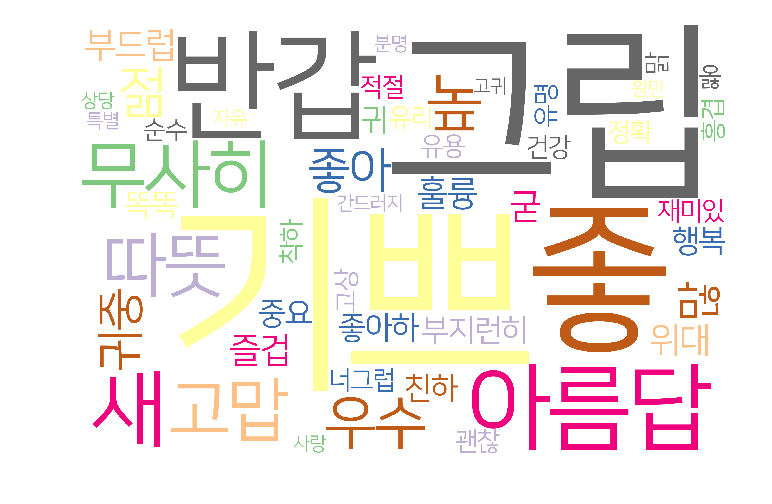

In [470]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/NanumSquare_acR.ttf', background_color = 'white', colormap = 'Accent_r',
                     max_words = 50, width = 3000, height = 2000).generate_from_frequencies(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [472]:
count = Counter(jpn_neg_list)
words = dict(count.most_common())
#words
for key, value in words.items():
    print(key, value)

어렵 33
없 33
외롭 13
안타깝 8
슬프 5
무섭 4
힘들 4
아프 4
부끄럽 4
미안 4
답답 3
괴롭 3
낡 3
약 3
시끄럽 2
쓸쓸히 2
불쌍히 2
쓸쓸 2
싫 2
그릇 2
불쌍 2
단념 1
쓰라리 1
심하 1
서늘 1
천하 1
초조 1
서운 1
약하 1
서럽 1
애절 1
허전 1
어색 1
어설프 1
부족 1
음흉 1
하찮 1
비참 1
반반 1
싸늘 1
어리석 1
딱하 1
무례 1
짧 1
불편 1
어처구니없 1
더러운 1
뚱뚱 1
무정 1


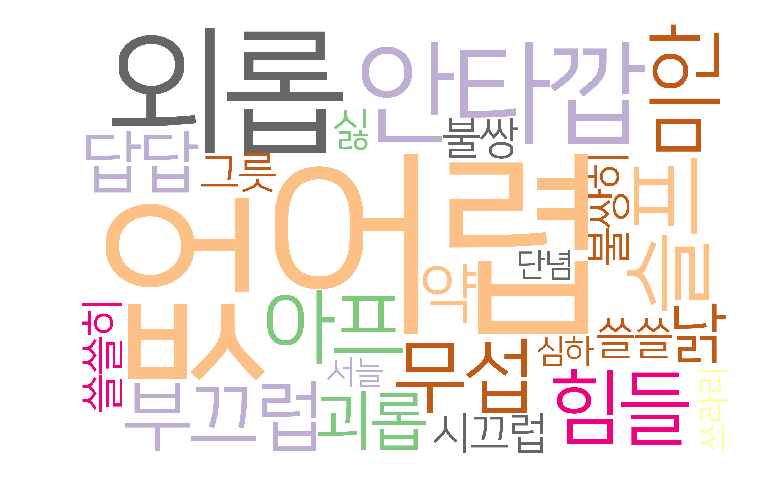

In [475]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/NanumSquare_acR.ttf', background_color = 'white', colormap = 'Accent_r',
                     max_words = 25, width = 3000, height = 2000).generate_from_frequencies(words)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()